In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
sys.path.append('/Users/amanpreetsingh/My Computer/VSCode/Market')

In [228]:
df = pd.read_csv('/Users/amanpreetsingh/My Computer/VSCode/Market/extracted_data/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [229]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [231]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [232]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']


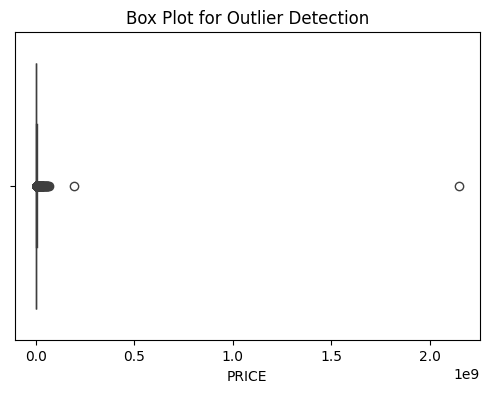

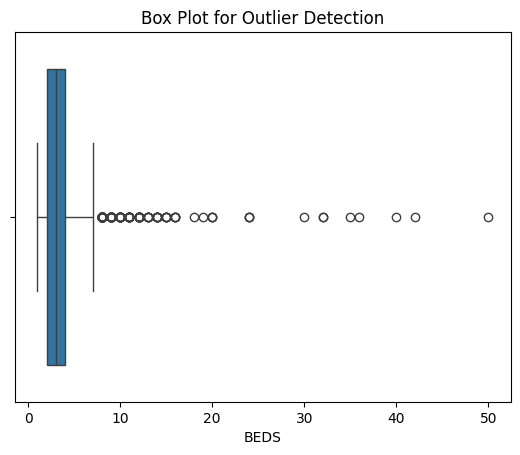

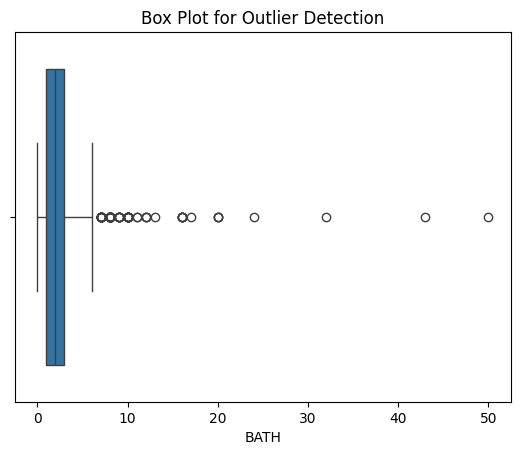

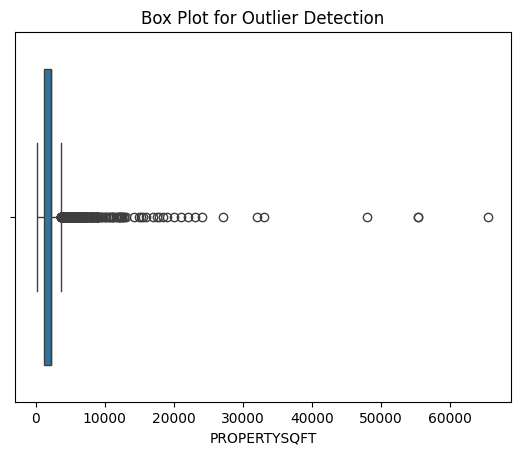

In [233]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PRICE'])
plt.title("Box Plot for Outlier Detection")
plt.show()
sns.boxplot(x=df['BEDS'])
plt.title("Box Plot for Outlier Detection")
plt.show()
sns.boxplot(x=df['BATH'])
plt.title("Box Plot for Outlier Detection")
plt.show()
sns.boxplot(x=df['PROPERTYSQFT'])
plt.title("Box Plot for Outlier Detection")
plt.show()

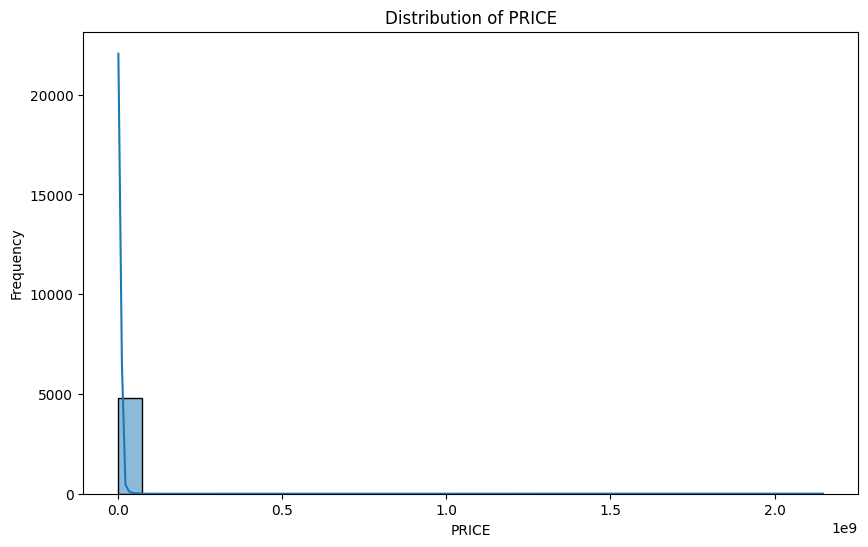

In [234]:
from analysis.analysis_src.univariate_analysis import hist_plot,count_plot
count_plot().my_plot(df,'PRICE')

In [235]:
df = df[df['PRICE'] != 2147483647]
df = df[df['PRICE'] != 195000000]


/Users/amanpreetsingh/My Computer/VSCode/Market/analysis/analysis_src/univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


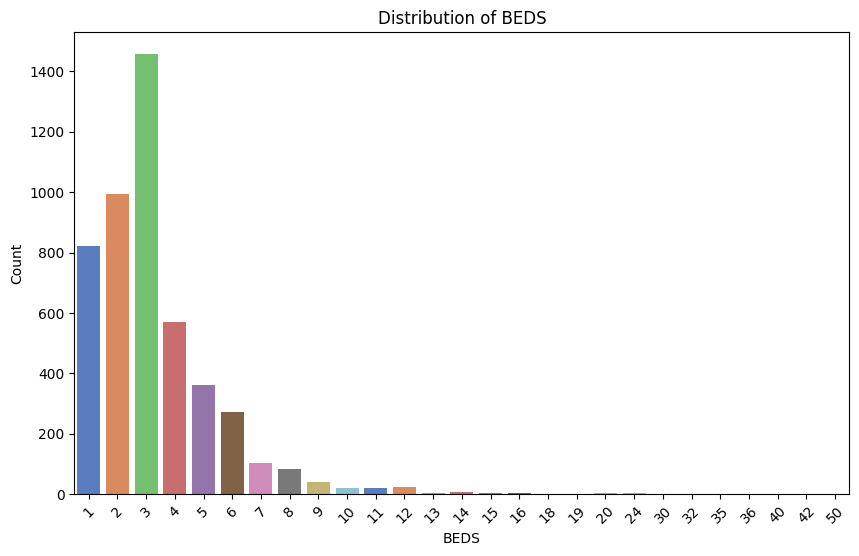

In [236]:
hist_plot().my_plot(df,'BEDS')

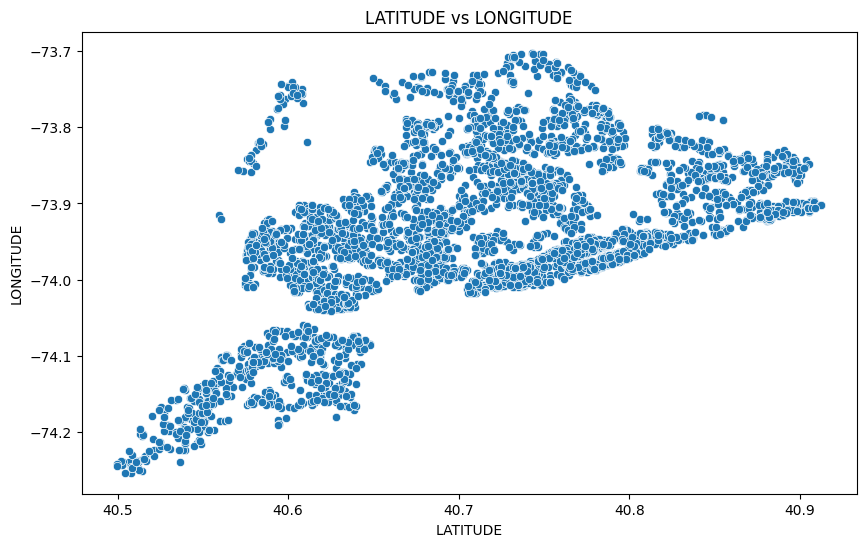

In [237]:
from analysis.analysis_src.bivariate_analysis import scatter_plot,box_plot
scatter_plot().my_plot(df,'LATITUDE','LONGITUDE')

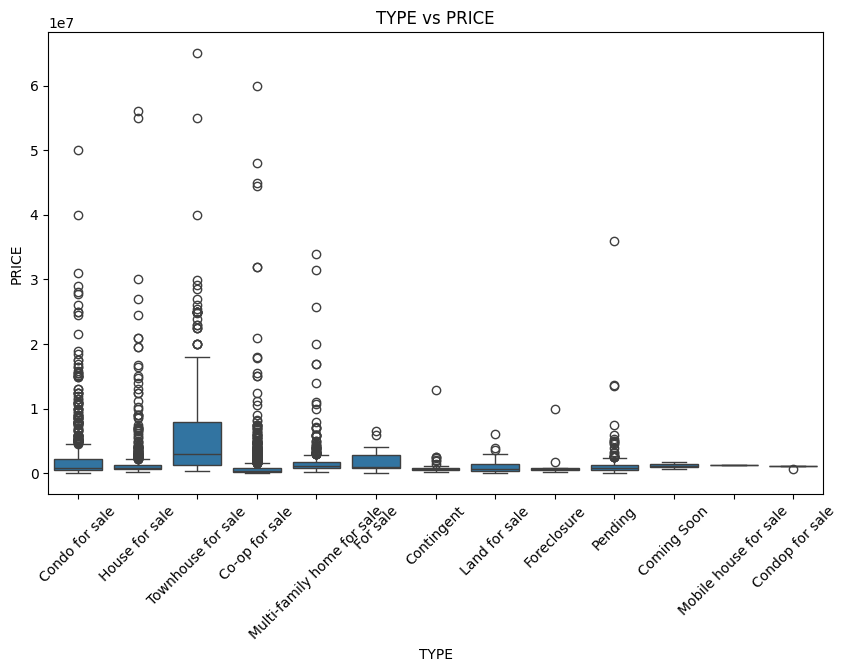

In [238]:
box_plot().my_plot(df,'TYPE','PRICE')

['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']


['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']

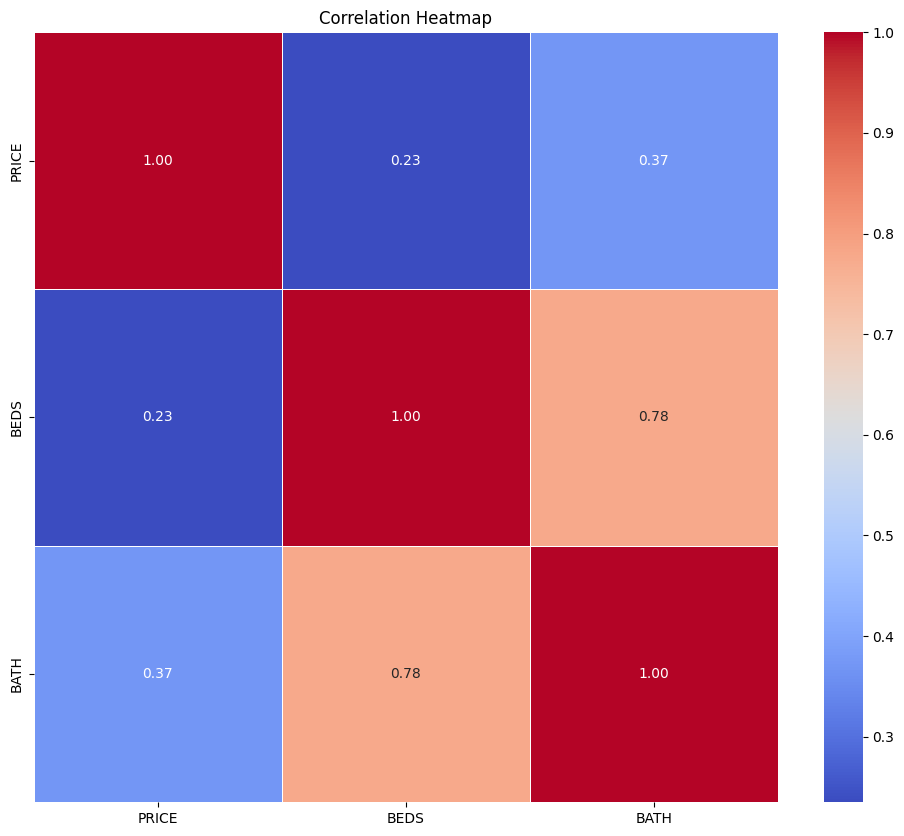

In [239]:
from analysis.analysis_src.multivariate_analysis import heatmap_pairplot

selected_features = df[['PRICE', 'BEDS', 'BATH']]
heatmap_pairplot().generate_correlation_heatmap(selected_features)

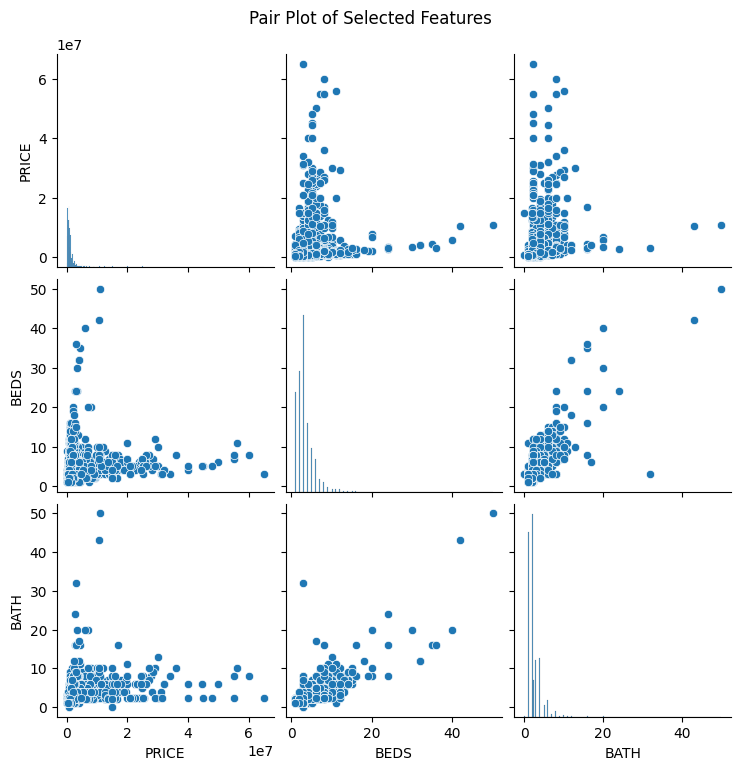

In [240]:
heatmap_pairplot().generate_pairplot(selected_features)

In [241]:
#FEATURE ENGINEERING
df_copy = df.copy()

In [248]:
df['STATE_modified'] = df['STATE'].str.split(',').str[0]

In [249]:
borough_mapping = {
    "Manhattan": ["New York", "New York City", "Nyc", "Ny", "Roosevelt Island", "Manhattan"],  
    "Brooklyn": ["Brooklyn", "Brooklyn Heights", "Bedford Stuyvesant", "Crown Heights", "Canarsie", 
                 "Brighton Beach", "Ditmas Park", "Old Mill Basin", "Prospect Lefferts Gardens",
                 "Brownville", "Kensington", "Stuyvesant Heights", "East Flatbush"],  
    "Queens": ["Queens", "Jackson Heights", "Elmhurst", "Woodside", "Rego Park", "Forest Hills", 
               "Briarwood", "Flushing", "Woodhaven", "Jamaica", "Richmond Hill South", "Whitestone", 
               "Ridgewood", "Rosedale", "Ozone Park", "Springfield Gardens", "Far Rockaway", "Bellerose", 
               "Bayside", "Astoria", "Floral Park", "Fresh Meadows", "Howard Beach", "Cambria Heights", 
               "Rockaway Park", "East Elmhurst", "Little Neck", "Long Island City", "Corona", "Kew Gardens", 
               "Maspeth", "Queens Village", "Richmond Hill", "Middle Village", "Saint Albans", "South Ozone Park", 
               "College Point", "Hollis", "Malba", "Glen Oaks", "Douglaston", "Sunnyside", "Arverne", "Glendale", 
               "Beechhurst", "Belle Harbor", "Kew Garden Hills", "Kew Gardens Hills","New Hyde Park"],  
    "Bronx": ["Bronx", "Bronx Ny"],  
    "Staten Island": ["Staten Island"],  
}


def map_borough(location):
    for borough, neighborhoods in borough_mapping.items():
        if location in neighborhoods:
            return borough
    return "Unknown"  # For locations that don’t fit

df['BOROUGH'] = df['STATE_modified'].apply(map_borough)

In [250]:
df['PRICE_PER_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']

In [251]:
df.drop(columns=['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 
                 'ADMINISTRATIVE_AREA_LEVEL_2','SUBLOCALITY', 'LOCALITY', 'STREET_NAME', 
                 'LONG_NAME', 'FORMATTED_ADDRESS', 'STATE_modified','PROPERTYSQFT'], inplace=True)


In [252]:
#df[df['SUBLOCALITY'] == 'Bronx County'][['LOCALITY', 'BOROUGH']]
df = df[[col for col in df.columns if col != 'PRICE'] + ['PRICE']]

In [256]:
df

,TYPE,BEDS,BATH,LATITUDE,LONGITUDE,BOROUGH,PRICE_PER_SQFT,PRICE
0,Condo for sale,2,2.000000,40.761255,-73.974483,Manhattan,225.000000,315000
2,House for sale,4,2.000000,40.541805,-74.196109,Staten Island,129.032258,260000
3,Condo for sale,3,1.000000,40.761398,-73.974613,Manhattan,155.056180,69000
4,Townhouse for sale,7,2.373861,40.767224,-73.969856,Manhattan,3880.070547,55000000
5,House for sale,5,2.000000,40.674363,-73.958725,Brooklyn,172.327672,690000
...,...,...,...,...,...,...,...,...
4796,Co-op for sale,1,1.000000,40.774350,-73.955879,Manhattan,274.241298,599000
4797,Co-op for sale,1,1.000000,40.732538,-73.860152,Queens,112.168812,245000
4798,Co-op for sale,1,1.000000,40.745882,-74.003398,Manhattan,583.735652,1275000
4799,Condo for sale,2,1.000000,40.742770,-73.872752,Queens,913.167939,598125


Will apply outlier handeling transformations after splitting to avoid data leakage

In [257]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['PRICE'])  # Features (independent variables)
y = df['PRICE']  # Target variable

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
TYPE_encoder = LabelEncoder()
X_train['BOROUGH_encoded'] = TYPE_encoder.fit_transform(X_train['BOROUGH'])  # Fit on training
X_test['BOROUGH_encoded'] = TYPE_encoder.transform(X_test['BOROUGH'])  # Transform test data

In [260]:
BOROUGH_encoder = LabelEncoder()
TYPE_encoder = LabelEncoder()
X_train['TYPE_encoded'] = TYPE_encoder.fit_transform(X_train['TYPE'])  # Fit on training
X_test['TYPE_encoded'] = TYPE_encoder.transform(X_test['TYPE'])  # Transform test data